Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 4**: The code in the cell below has errors. There are errors in style and errors preventing the code to run as intended. 

Your **task** is to find all mistakes, remove them, make the code function properly such that it presents a correct figure at the end and achieves a 10 out of 10 marks from the style checker. 

It is strongly recommended to start the exercise by copying the entire code to a separate python file and examine it in Spyder. The code checking should then improve your style mark.

**Note A**: Leave the function names unchanged. Some may be assumed in tests. Constant values as given are all correct.

**Note B**: Make sure you use the `pylintrc` file from Moodle for style checking (keep it in the same folder as your python file in Spyder so that style checking in Spyder automatically uses it as configuration file).

**Note C**: Copy your final solution back into the cell below so that the tests can run.

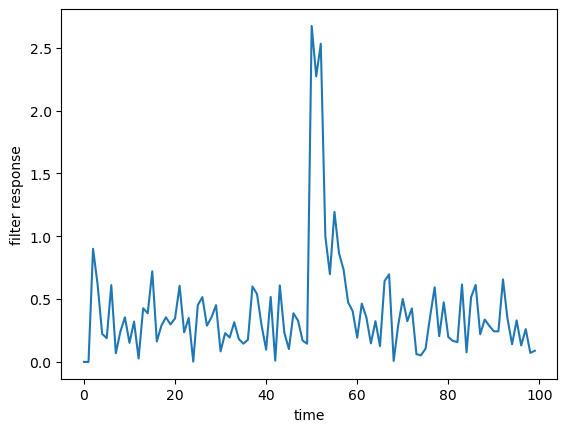

In [1]:
'''
One of the simplest change detect methods is the
online exponential filter, dating back to early radar applications.
Change detection means the comparison of each incoming value to the previous
value, see the detail and formula below.  If that numerical comparison of
the current value with the previous value exceeds a fixed threshold value then
an alarm is raised (or the location is stored as in this exercise). This
process can be implemented on a computer as a simple digital filter

The filter takes one data item after the other (online). The filter is
implemented in the function 'expofilter(prval, data, alpha).
The factor alpha is a gain factor or 'forgetfulness' factor,
quantifying how much influence on the filter previous data values should
have with values in the interval 0<=alpha<=1. Small alpha lead to hardly
any smoothing and the filter will react on any change in the signal very
sensitively while large alpha should show a clear change but react
little on noisy input.
'''
# YOUR CODE HERE
'''
Q4 assignment
author : Timothy Yap
student id : u2161367
'''
import numpy as np
import matplotlib.pyplot as plt

def expofilter(prval, data, alpha):
    '''
    Parameters
    ----------
    prval : previous value
    data : current value
    alpha : gain factor
    Returns
    -------
    filtered value after calculations based on previous and current values
    '''
    return alpha*prval + (1-alpha)*data # YR: no error in this line

def changeDetect(data, alpha, threshold):
    '''
    Parameters
    ----------
    data : current data
    alpha : gain factor
    threshold : alarm threshold
    Returns
    -------
    response : array of absolute differences between current and previous data
    change : array of times changes were made
    '''
    previousvalue = data[0]
    response = []
    change = []
    for counter, val in enumerate(data):
        value = expofilter(previousvalue, val, alpha)
        if abs(value-previousvalue)>threshold:
            change.append(counter)
        response.append(abs(value-previousvalue))
        previousvalue = value
    return np.array(response), np.array(change)

# Use case and testing;
# YR: No error below this line, style changes as appropriate are possible.
tseries = np.random.randint(-4,4,100)
tseries[50] += 20
tseries[51] += 20
tseries[52] += 20
alarmlevel = 1
gainfactor = 0.85
resp, alarms = changeDetect(tseries, gainfactor, alarmlevel)

# plotting
plt.plot(resp)
plt.xlabel('time')
plt.ylabel('filter response')
plt.show()


In [2]:
# test
assert (alarms[0]==49 or alarms[0]==50), 'wrong alarm start position'

### Tests - 1 mark; Style - 1 mark; Plot - 1 mark